In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
wine = load_iris()

data = pd.DataFrame(data=np.c_[wine['data'],wine['target']],columns=wine['feature_names']+['target'])

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


In [4]:
x = wine.data
y = wine.target

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [5]:
#Modelos
models = {
   'Regresión Logística' : LogisticRegression(max_iter=10000),
   'Máquinas de Soporte Vectorial' : SVC(),
   'Árbol de Decisión' : DecisionTreeClassifier()
}

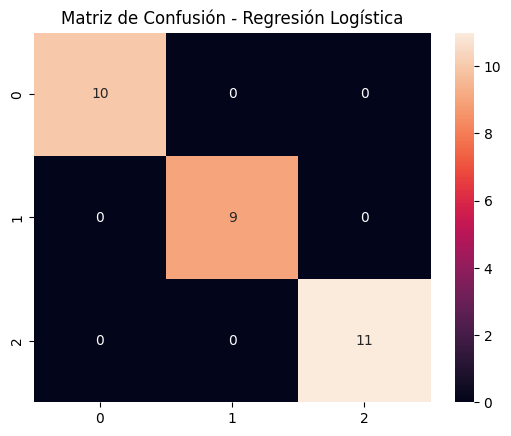

Modelo: Regresión Logística
Precisión: 1.0
Precisión: 1.0
Recall: 1.0
F1-Score: 1.0
Validación Cruzada (5-folds): 0.9733333333333334
----------------------


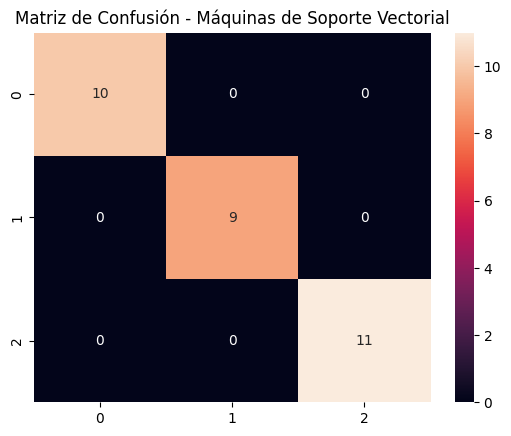

Modelo: Máquinas de Soporte Vectorial
Precisión: 1.0
Precisión: 1.0
Recall: 1.0
F1-Score: 1.0
Validación Cruzada (5-folds): 0.9666666666666666
----------------------


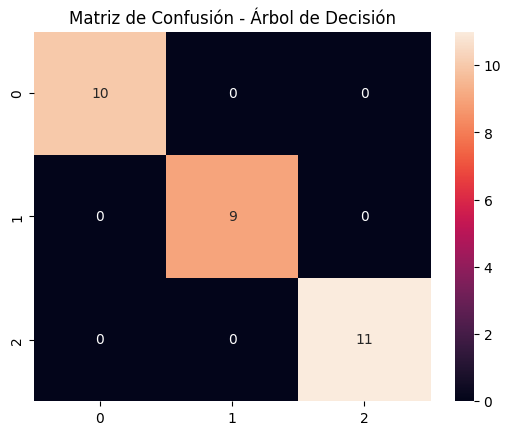

Modelo: Árbol de Decisión
Precisión: 1.0
Precisión: 1.0
Recall: 1.0
F1-Score: 1.0
Validación Cruzada (5-folds): 0.9666666666666668
----------------------


In [6]:
for name, model in models.items():
   #Entrenamiento
   model.fit(x_train,y_train)
   
   #Predicción
   y_pred = model.predict(x_test)
   
   #Métricas de Rendimiento
   accuracy = accuracy_score(y_test, y_pred)
   precision = precision_score(y_test, y_pred, average='macro')
   recall = recall_score(y_test, y_pred, average='macro')
   f1 = f1_score(y_test, y_pred, average='macro')
   
   #Validación Cruzada
   cross_val = cross_val_score(model, x, y, cv=5)
   
   #Matriz de Confunsión
   conf_matrix = confusion_matrix(y_test, y_pred)
   sns.heatmap(data=conf_matrix, annot=True)
   plt.title(f'Matriz de Confusión - {name}')
   plt.show()
   
   print(f'Modelo: {name}')
   print(f'Precisión: {accuracy}')
   print(f'Precisión: {precision}')
   print(f'Recall: {recall}')
   print(f'F1-Score: {f1}')
   #Impresión de Estimación
   print(f'Validación Cruzada (5-folds): {cross_val.mean()}')
   print('----------------------')